# Unsupervised Learning - Implementation

Here unsupervised learning is implemented using clustering techniques like KMeans Clustering and Hierarchical Clustering

### Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Preprocessing the data

In [26]:
df = df.rename(     # Renaming the columns for easy use
    columns={'sepal length (cm)': 'sepal_length',
             'sepal width (cm)' : 'sepal_width',
             'petal length (cm)' : 'petal_length',
             'petal width (cm)' : 'petal_width'})
df.head()   

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [30]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [31]:
df.shape

(150, 4)

In [9]:
df.size


600

In [32]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


As from all the analysis done above, we can see that all columns contain data of type float so there is no need for encoding.It is instructed to remove species column. Since the desired coumn is not found there is nothing to drop.

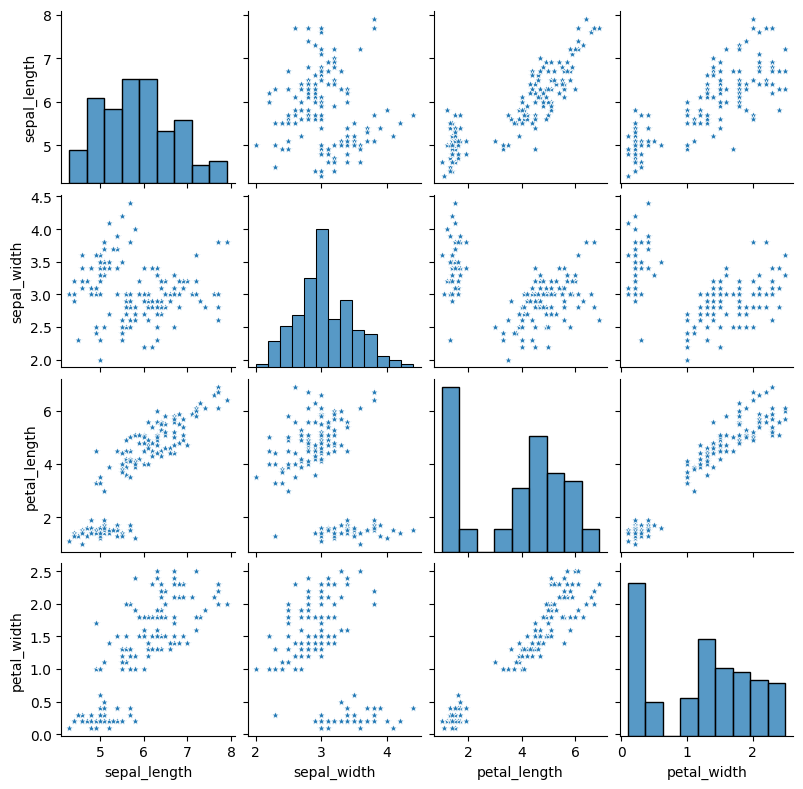

In [33]:
sns.pairplot(df,markers = '*',height=2)   # Shows the relation between each columns
plt.show()

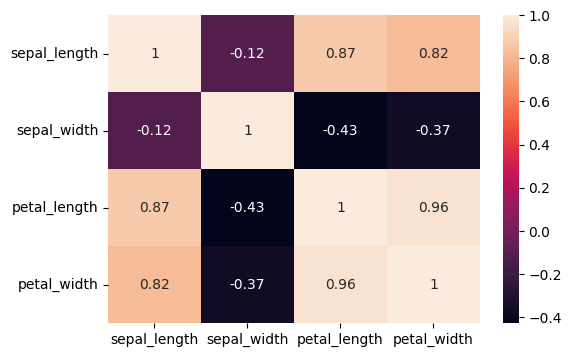

In [34]:
plt.figure(figsize=(6,4))  # Show the correlation between each columns
sns.heatmap(df.corr(), annot=True) 
plt.show()

From this plot we can say that they are highly correlated and we can make a heatmap showing the correlation.And from the heatmap, it shows that the correlation affecting positively and negatively.

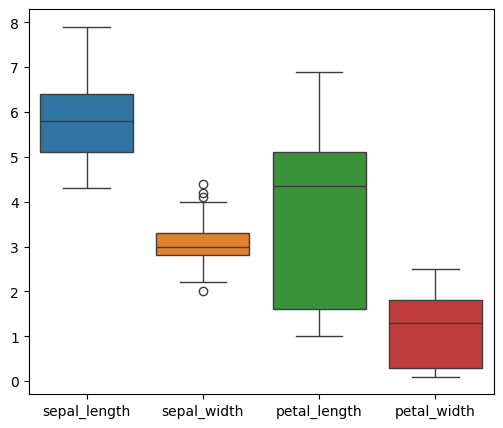

In [35]:
plt.figure(figsize=(6, 5))  # displaying boxplot for identifying the outliers in each column
plt.subplot(1, 1, 1)  
sns.boxplot(data=df)
plt.show()

There are outliers in Sepal width column and we have to remove the outliers.For that we use IQR method.

In [37]:
sw_Q1 = df['sepal_width'].quantile(0.25)
sw_Q3 = df['sepal_width'].quantile(0.75)
sw_IQR = sw_Q3 - sw_Q1
print(" Sepal Width Q1 :",sw_Q1)
print(" Sepal Width Q3 :",sw_Q3)

# finding the lower whisker and upper whisker
lw = sw_Q1 - 1.5 * sw_IQR
uw = sw_Q3 + 1.5 * sw_IQR
print("Threshold below :",lw)
print("Threshold above :",uw)

# Identifying outliers
Outlier_sw = df[(df['sepal_width'] < lw) | (df['sepal_width'] > uw)]
print("\nOutliers found in Sepal Width are shown below")
Outlier_sw

 Sepal Width Q1 : 2.8
 Sepal Width Q3 : 3.3
Threshold below : 2.05
Threshold above : 4.05

Outliers found in Sepal Width are shown below


,sepal_length,sepal_width,petal_length,petal_width
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0


In [38]:
df_cleaned = df[(df['sepal_width'] > lw) & (df['sepal_width'] < uw)]   # after removing the outliers
df_cleaned

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


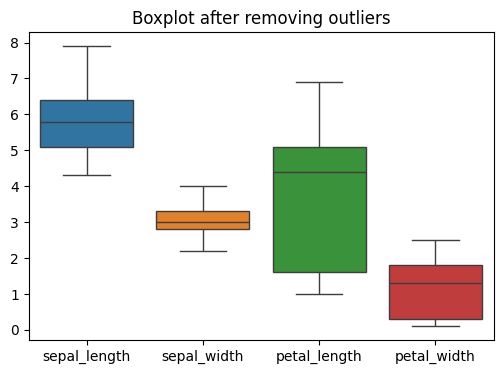

In [40]:
plt.figure(figsize=(6, 4))  
plt.title('Boxplot after removing outliers')
plt.subplot(1, 1, 1)  # Create a single subplot
sns.boxplot(data=df_cleaned)
plt.show()

In [41]:
df_cleaned.duplicated().sum()   # checking if any duplicates are present

1

In [42]:
df_cleaned = df_cleaned.drop_duplicates()    # to delete the duplicated values
df_cleaned.duplicated().sum()

0

##  KMeans Clustering Implementation

KMeans clustering is a partition-based method that aims to divide a dataset into K distinct, non-overlapping subsets (clusters). It is done by the following steps:

Initializing K centroids randomly.

Assigning each data point to the nearest centroid based on Euclidean distance.

Recalculating the centroids as the mean of the assigned data points.

Repeating steps 2 and 3 until the centroids converge (i.e., their positions no longer change significantly).

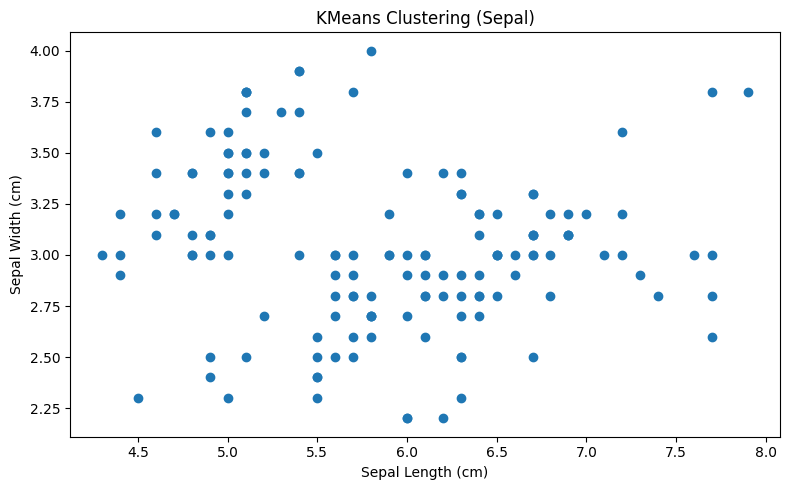

In [45]:
from sklearn.cluster import KMeans   # Import necessary libraries

plt.figure(figsize=(8, 5))     # Visualizing the clusters

plt.scatter(df_cleaned['sepal_length'], df_cleaned['sepal_width'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KMeans Clustering (Sepal)')

plt.tight_layout()
plt.show()

Scatterplot between Sepal Length and Sepal Width to find the number of clusters visually. It is difficult to find the number of clusters visually we have to use elbow method and silhoutte score method.

[653.3326896551725, 143.53031578947366, 72.81484867818803, 52.87148623613384, 46.99246456552707, 43.55607567663818, 36.35197637292465, 33.22326177472923, 27.34424010412246]


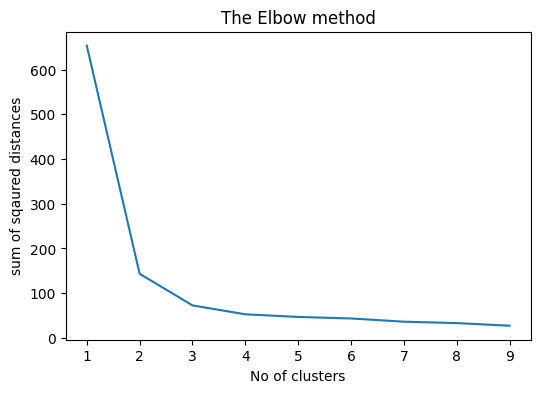

In [50]:
# Plotting the Elbow plot to find the number of clusters
wcss = []  # within cluster sum of sqaures
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state=42)
    kmeans.fit(df_cleaned)
    wcss.append(kmeans.inertia_)

print(wcss)

plt.figure(figsize=(6, 4)) 
plt.plot(range(1,10),wcss)
plt.title('The Elbow method')
plt.xlabel('No of clusters')

plt.ylabel('sum of sqaured distances')
plt.show()

The optimal number of clusters (k) is typically identified at the "elbow point" in the elbow plot, where the WCSS starts to decrease at a slower rate. From the plot, the elbow point appears to be at ( k = 3 ). This suggests that 3 clusters are the optimal number for the Iris dataset.

In [47]:
from sklearn.metrics import silhouette_score    # finding the silhouette score method to find the number of clusters (highest silhouette score considers to number of clusters)
sil_score = []
k_rng = range(2,11)
for i in k_rng:
    kmeans = KMeans(n_clusters=i)
    km_pred = kmeans.fit_predict(df_cleaned)
    sil_score.append(silhouette_score(df_cleaned, km_pred))
sil_score

[0.6862748864185023,
 0.5568015415344493,
 0.49399986379155075,
 0.4959020614032666,
 0.48211412318590324,
 0.32433339348719514,
 0.33434748317746354,
 0.306928816696298,
 0.32016485722939647]

The silhouette coefficient measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

It ranges from -1 to 1, where a higher value indicates better-defined clusters.
For the Iris dataset, a peak in the silhouette coefficient at 2 clusters suggests that, on average, samples are well-matched to their own cluster and poorly matched to neighboring clusters when there are 2 clusters.
As per silhouette score we can see that tumber  no of clusters will be 2. But as per elbow method and domain knowledge we can take 3 as number of clus.ters

Text(0.5, 1.0, 'Silhouette Score vs. Num of Clusters')

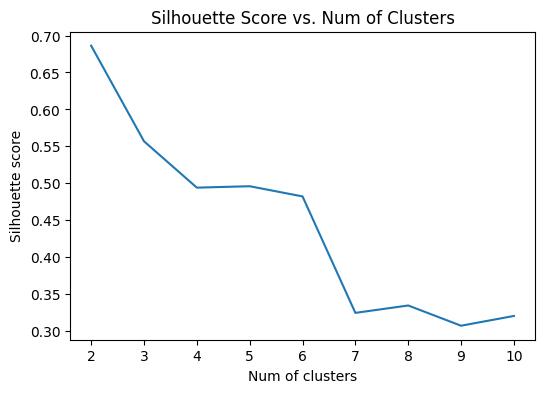

In [49]:
plt.figure(figsize=(6, 4)) 
plt.xlabel('Num of clusters')
plt.ylabel('Silhouette score')
plt.plot(k_rng,sil_score)
plt.title('Silhouette Score vs. Num of Clusters')

This plot shows the number of clusters taken from silhouette score ( higher silhouette score is optimal ).

### Scaling

In [51]:
from sklearn.preprocessing import StandardScaler  # Importing Standard Scaler 
scaler = StandardScaler()
dfc_scaled = scaler.fit_transform(df)

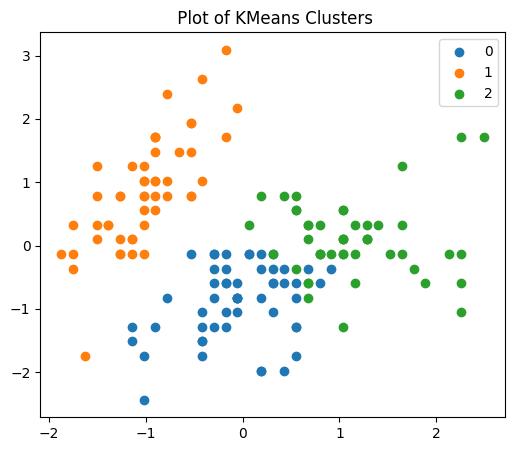

In [53]:
kmeans = KMeans(n_clusters=3, random_state=0)   # Apply KMeans clustering
y = kmeans.fit_predict(dfc_scaled)
unique_labels = np.unique(y)

plt.figure(figsize=(6, 5)   )# Visualize the clusters
for i in unique_labels:
    plt.scatter(dfc_scaled[y==i,0],dfc_scaled[y==i,1],label=i)
plt.title(' Plot of KMeans Clusters')
plt.legend()
plt.show()

The different colored points represent different clusters. Each cluster groups together data points that are similar to each other based on their features. This visualization helps in understanding how the data points are grouped based on their sepal dimensions.

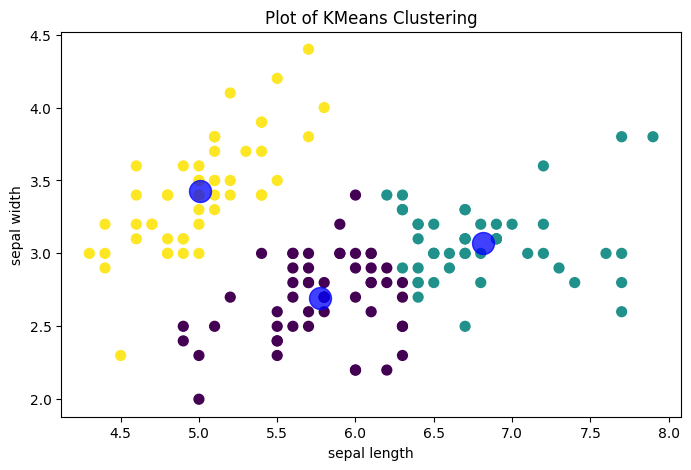

In [56]:
dfc_scaled = iris.data[:, :2]  # Use only the first two features for simplicity
 
kmeans = KMeans(n_clusters=3, random_state=0)  # Fit KMeans
y_kmeans = kmeans.fit_predict(dfc_scaled)
 
plt.figure(figsize=(8, 5))   # Plotting
plt.scatter(dfc_scaled[:, 0], dfc_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=250, alpha=0.75)
plt.title("Plot of KMeans Clustering")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

The different colored points represent different clusters. Each cluster groups together data points that are similar to each other based on their features. Found the centers of each clusters to to form equally.

### Explaining why KMeans is Suitable for the Iris Dataset:
The Iris dataset has a simple structure with distinct species that are expected to form well-separated clusters. KMeans is efficient for datasets with a moderate number of features and samples, as is the case here.

## Implementing Hierarchial clustering algorithm in the Iris Dataset

### Description:

Hierarchical clustering creates a hierarchy of clusters either by:

Agglomerative (Bottom-Up): Starting with individual data points as their own clusters and iteratively merging the closest clusters.

Divisive (Top-Down): Starting with all data points in one cluster and iteratively splitting them.

In agglomerative clustering, which is more common, clusters are merged based on a linkage criterion such as single, complete, or average linkage.

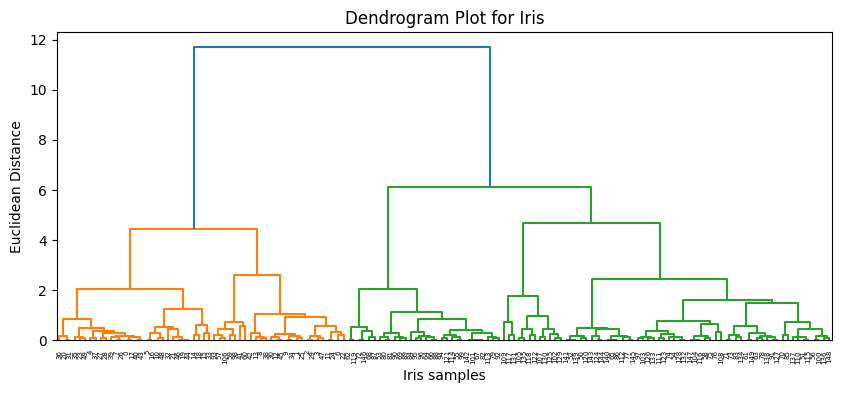

In [62]:
import scipy.cluster.hierarchy as shc   # Dendrogram plot

plt.figure(figsize=(10, 4))     # Calculate linkage using Ward's method and create the dendrogram
linked = shc.linkage(dfc_scaled, method="ward")
dendro = shc.dendrogram(linked)

plt.title("Dendrogram Plot for Iris")
plt.ylabel("Euclidean Distance")
plt.xlabel("Iris samples")
plt.show()

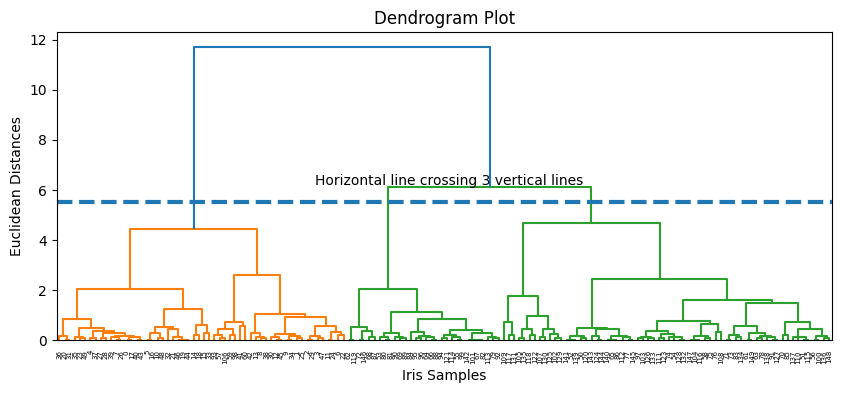

In [63]:
plt.figure(figsize=(10, 4))
dendro = shc.dendrogram(linked)
plt.hlines(y=5.5,xmin=0,xmax=1500,lw=3,linestyles='--')
plt.text(x=500,y=6.2,s='Horizontal line crossing 3 vertical lines')
plt.title("Dendrogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Iris Samples")
plt.show()

A horizontal line is drawn in the dendogram plot to find the number of clusters in Hierarchial clustering ( finds by the touch point of horizontal line and vertical heirarchy plot)

In [64]:
from sklearn.cluster import AgglomerativeClustering   #build the model
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(dfc_scaled)
hc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int64)

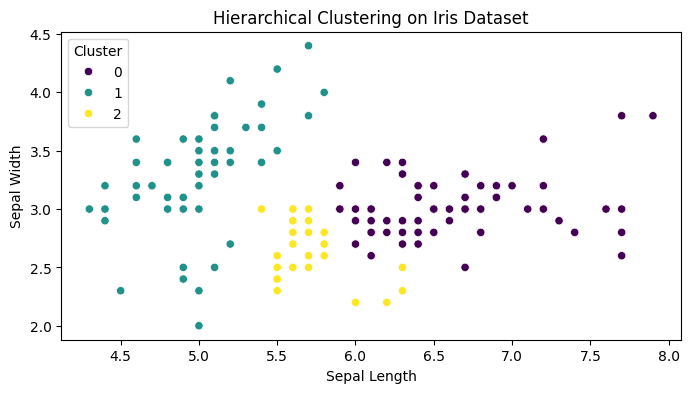

In [66]:
plt.figure(figsize=(8, 4))  # Plotting
sns.scatterplot(x=dfc_scaled[:, 0], y=dfc_scaled[:, 1], hue=hc_pred, palette='viridis')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Cluster')
plt.show()


Scatterplot shows the number of clusters with different colours between Sepal width and Sepal length ( number of clusters found in dendogram as 3)

### Silhouette Analysis

In [67]:
sa = []
for k in k_rng:
    hc=AgglomerativeClustering(n_clusters=k)
    hc_pred=hc.fit_predict(dfc_scaled)
    sa.append(silhouette_score(dfc_scaled, hc_pred))

sa

[0.47767996898758935,
 0.3653346819163389,
 0.38231594211850395,
 0.38724618388871157,
 0.3918000357829499,
 0.34449589365226896,
 0.32799364657656743,
 0.3520317540988587,
 0.36717791299216374]

Hierarchical clustering is better suited for small datasets due to its high time and space complexity.

### Why Hierarchical Clustering is Suitable for the Iris Dataset:
The method does not require the number of clusters to be specified a priori, which is useful if the number of natural groupings is unknown. It provides a dendrogram, offering a visual insight into the data structure and the appropriate number of clusters.